# Predicting School Failure in the UK with scikit-learn
Data taken from [Ofsted](https://reports.ofsted.gov.uk/)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import re
# Get all most recent closed files
patterns = ["Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.ofsted.gov.uk", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
closed_school_names = []
closed = []
closed_root = './schools/closed/'
for path, subdirs, files in os.walk(closed_root):
  for s in subdirs:
    f = os.path.join(path,s)
    for p2, s2, f2 in os.walk(f):
      most_recent = [int(f.replace(".txt","")) for f in f2 if f != ' ']
      if most_recent:
        doc = max(most_recent)
        txt = open(os.path.join(p2,str(doc)+'.txt'), "r")
        content = txt.read()
        if re.search("Childminder Report", content):
          continue
        content = content.replace('\n','')
        for pattern in patterns:
          content = content.replace(pattern, '') 
        if content == '':
          continue
        closed_school_names.append(s)
        closed.append(content)

In [3]:
# Get all most recent open files
patterns = ["Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
opened = []
open_school_names = []
open_root = './schools/open/'
for path, subdirs, files in os.walk(open_root):
  for s in subdirs:
    f = os.path.join(path,s)
    for p2, s2, f2 in os.walk(f):
      most_recent = [int(f.replace(".txt","")) for f in f2 if f != ' ']
      if most_recent:
        doc = max(most_recent)
        content = txt.read()
        txt = open(os.path.join(p2,str(doc)+'.txt'), "r")
        if re.search("Childminder Report", content):
          continue
        if re.search("Childminder", content):
          continue
        content = content.replace('\n','')
        for pattern in patterns:
          content = content.replace(pattern, '')
        if content == '':
          continue
        open_school_names.append(s)
        opened.append(content)

In [4]:
import pandas as pd
df_closed = pd.DataFrame()
closed_labels = ["closed" for school in closed]
df_closed["school"] = closed_school_names
df_closed["text"] = closed
df_closed["label"] = closed_labels

In [5]:
df_closed.head()

school  \
0                      Tweeddale Primary School   
1    Loganberries Childcare And Tutoring Closed   
2  Dovedale Before and After School Club Closed   
3                                Pepe & Friends   
4      Cottonstones Pre-School Playgroup Closed   

                                                text   label  
0   School report      Tweeddale Primary School T...  closed  
1      Loganberries Childcare And Tutoring    Hol...  closed  
2      Dovedale Before and After School Club    D...  closed  
3  Pepe & Friends16 Skylines Village, Limeharbour...  closed  
4  DAY CARE INSPECTION REPORTURN 303724INSPECTION...  closed

In [6]:
# Filter out schools that were marked as closed due to academy conversion
import numpy as np
df_closed = df_closed.replace(np.nan, '', regex=True)
df_closed = df_closed[df_closed.text.apply(lambda x: bool(re.search("academy conversion",x,re.IGNORECASE)))]

In [7]:
df_open = pd.DataFrame()
open_labels = ["open" for school in opened]
df_open["school"] = open_school_names
df_open["text"] = opened
df_open["label"] = open_labels

In [8]:
df_open.head()

school  \
0                                      URN: EY417621   
1                                       Magpies West   
2  St John's Church of England Primary School, La...   
3                         Stoneydelph Primary School   
4                                     Pepe & Friends   

                                                text label  
0   School report      Tweeddale Primary School T...  open  
1   Ofsted Piccadilly Gate Store Street Mancheste...  open  
2      Magpies West    West Kidlington Primary Sc...  open  
3     Existing academy: St John's Church of Engla...  open  
4  Existing academy: Stoneydelph Primary SchoolUR...  open

In [9]:
df = df_closed.append(df_open, ignore_index=True)
df.label.unique()

array(['closed', 'open'], dtype=object)

In [10]:
df.head()

school  \
0                        St Uny CofE School   
1     Grove House Infant and Nursery School   
2                          Lyng Hall School   
3         Christ Church CofE Primary School   
4  St Barnabas CofE First and Middle School   

                                                text   label  
0     Existing academy: St Uny CofE SchoolURN: 14...  closed  
1     Existing academy: Grove House Nursery and I...  closed  
2     Existing academy: Lyng Hall SchoolURN: 1429...  closed  
3     Existing academy: Christ Church CofE Primar...  closed  
4     Existing academy: St Barnabas CofE First an...  closed

In [11]:
print (len(closed))
print (len(opened))

43307
49354


In [12]:
!pip install wordcloud

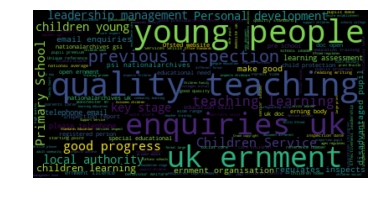

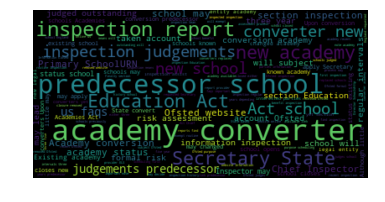

In [13]:
from wordcloud import WordCloud
import PIL
import itertools
import matplotlib.pyplot as plt

targets = ['text']

l1 = df_closed['text'].values.tolist()
l2 = df_open['text'].values.tolist()
school_categories = [l1, l2]

for schools,target in zip(school_categories, targets):
  raw_str = df[target].str.cat(sep=',')
  wordcloud = WordCloud( max_words=1000,margin=0).generate(raw_str)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

for o_schools,target in zip(l2, targets):
  raw_str = df_open[target].str.cat(sep=',')
  wordcloud = WordCloud(max_words=1000,margin=0).generate(raw_str)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

for c_schools,target in zip(l1, targets):
  raw_str = df_closed[target].str.cat(sep=',')
  wordcloud = WordCloud(max_words=1000,margin=0).generate(raw_str)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [14]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ") # Clean up non-alphabetical symbols
import numpy as np
df = df.replace(np.nan, '', regex=True)

In [15]:
# Clean up stopwords
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vcabales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df.head()

school  \
0                        St Uny CofE School   
1     Grove House Infant and Nursery School   
2                          Lyng Hall School   
3         Christ Church CofE Primary School   
4  St Barnabas CofE First and Middle School   

                                                text   label  
0  Existing academy St Uny CofE SchoolURN Predece...  closed  
1  Existing academy Grove House Nursery Infant Co...  closed  
2  Existing academy Lyng Hall SchoolURN Predecess...  closed  
3  Existing academy Christ Church CofE Primary Sc...  closed  
4  Existing academy St Barnabas CofE First Middle...  closed

In [17]:
from sklearn.model_selection import train_test_split # Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.33, random_state=42) 
# y_train and y_test are lists of labels

In [18]:
X_train.shape

(33422,)

In [19]:
X_test.shape

(16462,)

In [20]:
y_train.shape

(33422,)

In [21]:
# Tokenize the words - CountVectorizer filters out stopwords, previous step might have been unnecessary
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(33422, 122866)

In [22]:
# Transform testing data with CountVectorizer, use later to check for overfitting / underfitting
test_features = count_vect.transform(X_test)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
X_train_tfidf = TfidfTransformer(smooth_idf=True,use_idf=True)
X_train_tfidf.fit(X_train_counts)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [24]:
# print idf values
df_idf = pd.DataFrame(X_train_tfidf.idf_, index=count_vect.get_feature_names(),columns=["tf_idf_weights"])
df_idf.sort_values(by=['tf_idf_weights'])
# the lower the idf value, the less unique the word is (meaning that the word appears more frequently)

tf_idf_weights
the                          1.009741
inspection                   1.038583
ofsted                       1.039672
information                  1.050439
this                         1.065307
education                    1.102595
inspector                    1.111118
visit                        1.116482
website                      1.128692
schools                      1.128794
ensure                       1.132818
children                     1.137991
report                       1.140915
staff                        1.148487
team                         1.158744
school                       1.159867
work                         1.163771
services                     1.164617
well                         1.165711
learning                     1.166170
support                      1.166595
skills                       1.167160
including                    1.168965
quality                      1.170064
carried                      1.170951
improve                      1.172977
made                         1.173688
safeguarding                 1.178934
effective                    1.184100
following                    1.186369
...                               ...
initiativesmanager          10.723852
initiativesleadership       10.723852
initiativeskey              10.723852
initiativesinspectors       10.723852
initiativesinspection       10.723852
initiativesgrades           10.723852
initiativewill              10.723852
initiators                  10.723852
injarrow                    10.723852
injesmond                   10.723852
inlearners                  10.723852
inlearner                   10.723852
inlambeth                   10.723852
inkpen                      10.723852
inking                      10.723852
inkersallprimary            10.723852
inkent                      10.723852
inkeeping                   10.723852
inlight                     10.723852
inkarate                    10.723852
injuriesor                  10.723852
injuriesin                  10.723852
injuriesensure              10.723852
injuriesappropriately       10.723852
injurd                      10.723852
injune                      10.723852
injuly                      10.723852
injob                       10.723852
injuryensure                10.723852
zzz                         10.723852

[122866 rows x 1 columns]

In [25]:
X_train_dtm = count_vect.transform(X_train)

In [26]:
# Use dummy classifier to get a baseline
from sklearn.dummy import DummyClassifier 
baseline = DummyClassifier().fit(X_train_dtm, y_train)

In [27]:
y_pred_class_baseline = baseline.predict(test_features)

In [28]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class_baseline) # Record baseline accuracy

0.9798930871097072

In [30]:
metrics.confusion_matrix(y_test, y_pred_class_baseline)

array([[    1,   179],
       [  152, 16130]])

In [35]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['closed','open']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[    1   179]
 [  152 16130]]
Normalized confusion matrix
[[0.01 0.99]
 [0.01 0.99]]


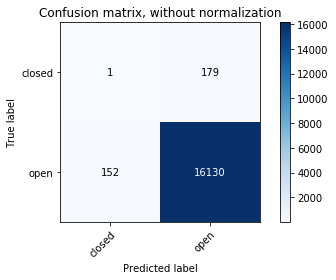

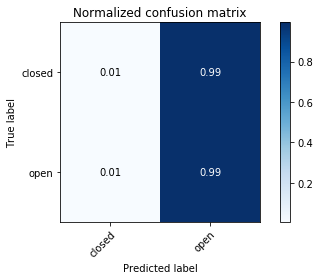

In [36]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_baseline, classes=['closed','open'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_baseline, classes=['closed','open'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [37]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB().fit(X_train_dtm, y_train)

In [38]:
# Make predictions with testing features from X_test
y_pred_class_multi_nb = multi_nb.predict(test_features)

In [39]:
metrics.accuracy_score(y_test, y_pred_class_multi_nb)

0.9528003887741465

In [40]:
# examine class distribution
print(y_test.value_counts())
# there is a majority class of 0 here, hence the classes are skewed

# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1208
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(1208 / (1208 + 185)))

open      16282
closed      180
Name: label, dtype: int64
Null accuracy: open    0.989066
Name: label, dtype: float64
Manual null accuracy: 0.8671931083991385


In [42]:
metrics.confusion_matrix(y_test, y_pred_class_multi_nb)

array([[  160,    20],
       [  757, 15525]])

Confusion matrix, without normalization
[[  160    20]
 [  757 15525]]
Normalized confusion matrix
[[0.89 0.11]
 [0.05 0.95]]


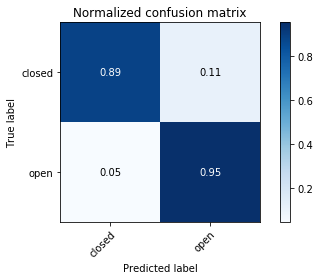

In [43]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_multi_nb, classes=['closed','open'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_multi_nb, classes=['closed','open'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [45]:
X_test[y_pred_class_multi_nb > y_test]

332    Ofsted Piccadilly Gate Store Street Manchester...
419    July Mr Alan Gaunt Interim Executive Headteach...
210    October Mrs Pat Gardner Acting Headteacher Gle...
194    School report The Community College Whitstable...
150    School report Carr Junior School Ostman Road A...
499    Ofsted Piccadilly Gate Store Street Manchester...
261    March Rose Payne Woolden Hill Primary School N...
38     Ofsted Piccadilly Gate Store Street Manchester...
171    Ofsted Piccadilly Gate Store Street Manchester...
98     Ofsted Piccadilly Gate Store Street Manchester...
304    Ofsted Piccadilly Gate Store Street Manchester...
267    Ofsted Piccadilly Gate Store Street Manchester...
311    Ofsted Piccadilly Gate Store Street Manchester...
494    July Julie Finch Headteacher KICKSTART Telford...
239    School report Robert Shaw Primary School South...
134    April Ms Alison Loffler Executive Headteacher ...
69     Ofsted Piccadilly Gate Store Street Manchester...
30     October Mr Stephen Macka

In [48]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    print

    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)

In [49]:
most_informative_feature_for_binary_classification(count_vect, multi_nb)

closed -17.565775826467 arragon
closed -17.565775826467 ashburtondevontq
closed -17.565775826467 avenuebirleysheffieldsouth
closed -17.565775826467 avenuechestertonnewcastle
closed -17.565775826467 avenuesouthwayplymouthdevonpl
closed -17.565775826467 avenuestainessurreytw
closed -17.565775826467 baysouthend
closed -17.565775826467 beaminsterstmarys
closed -17.565775826467 beespoke
closed -17.565775826467 bradstock
open -3.8195242468215316 pupils
open -3.836055209930393 children
open -3.9858002777979227 school
open -4.116089078838797 the
open -4.446146182308727 staff
open -4.579296320883536 good
open -4.699474414800751 inspection
open -4.7352337429507365 learning
open -4.771363890982286 well
open -5.024260045086786 uk
